In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
zomato=pd.read_csv('zomato.csv ',encoding='latin-1')

In [4]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
zomato.shape

(9551, 21)

In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
for features in zomato.columns:
   if zomato[features].isnull().sum()>0:
       print(features)

Cuisines


In [8]:
#or
[features for features in zomato.columns if zomato[features].isnull().sum()>0]

['Cuisines']

In [9]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
c=pd.read_excel('Country-Code.xlsx')

In [11]:
c.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [12]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [19]:
final_df=pd.merge(zomato,c,on='Country Code',how='left')
final_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [14]:
 final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


In [15]:
final_df.info

<bound method DataFrame.info of       Restaurant ID                           Restaurant Name  Country Code  \
0           3400025                                Jahanpanah             1   
1           3400341                       Rangrezz Restaurant             1   
2           3400005                   Time2Eat - Mama Chicken             1   
3           3400021     Chokho Jeeman Marwari Jain Bhojanalya             1   
4           3400017                            Pinch Of Spice             1   
...             ...                                       ...           ...   
9546       17697389                       The Screaming Eagle           216   
9547       17697424                             The Thai Bowl           216   
9548       17697332                Tokyo Japanese Steak House           216   
9549       17694056  Theo Yianni's Authentic Greek Restaurant           216   
9550       17559793                 Fishpatrick's Crabby Cafe           216   

                Cit

In [16]:
country_names=final_df.Country.unique()
country_names

array(['India', 'Australia', 'Brazil', 'Canada', 'Indonesia',
       'New Zealand', 'Phillipines', 'Qatar', 'Singapore', 'South Africa',
       'Sri Lanka', 'Turkey', 'UAE', 'United Kingdom', 'United States'],
      dtype=object)

In [17]:
total_country=len(country_names)
total_country

15

In [21]:
country_count=final_df.Country.value_counts()
country_count

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [23]:
labels=country_count=final_df.Country.value_counts().index
labels

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [24]:
values=country_count=final_df.Country.value_counts().values
values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x22eb487f950>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.4%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.7%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.9%')])

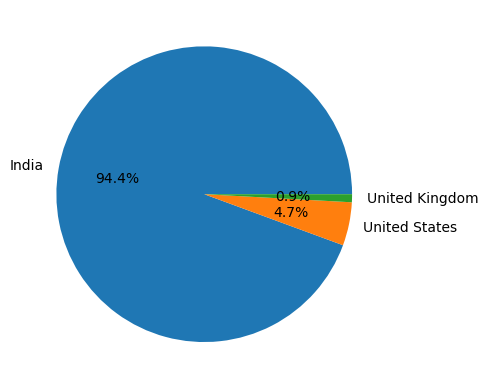

In [26]:
plt.pie(values[:3],labels=labels[:3],autopct='%1.1f%%')

In [28]:
final_df[['Aggregate rating','Rating color','Rating text']]

,Aggregate rating,Rating color,Rating text
0,4.8,Dark Green,Excellent
1,4.5,Dark Green,Excellent
2,4.4,Green,Very Good
3,4.9,Dark Green,Excellent
4,4.8,Dark Green,Excellent
...,...,...,...
9546,4.1,Green,Very Good
9547,4.2,Green,Very Good
9548,3.7,Yellow,Good
9549,4.0,Green,Very Good


In [29]:
final_df.groupby('Rating text').count().size

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Country
Rating text,,,,,,,,,,,,,,,,,,,,,
Average,3737,3737,3737,3737,3737,3737,3737,3737,3737,3734,...,3737,3737,3737,3737,3737,3737,3737,3737,3737,3737
Excellent,301,301,301,301,301,301,301,301,301,300,...,301,301,301,301,301,301,301,301,301,301
Good,2100,2100,2100,2100,2100,2100,2100,2100,2100,2096,...,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100
Not rated,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,...,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
Poor,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
Very Good,1079,1079,1079,1079,1079,1079,1079,1079,1079,1078,...,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079


In [37]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).count()

,,,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Country
Aggregate rating,Rating color,Rating text,,,,,,,,,,,,,,,,,,,
0.0,White,Not rated,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
1.8,Red,Poor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.9,Red,Poor,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2.0,Red,Poor,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2.1,Red,Poor,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2.2,Red,Poor,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
2.3,Red,Poor,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
2.4,Red,Poor,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
2.5,Orange,Average,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110


In [45]:
rating=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()
rating

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [46]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   -rating=final_df.groupby(['Aggregate rating','Rating color','Rating text']).count()
rating

,,,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Country
Aggregate rating,Rating color,Rating text,,,,,,,,,,,,,,,,,,,
0.0,White,Not rated,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
1.8,Red,Poor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.9,Red,Poor,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2.0,Red,Poor,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2.1,Red,Poor,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2.2,Red,Poor,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
2.3,Red,Poor,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
2.4,Red,Poor,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
2.5,Orange,Average,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110


In [47]:
rating=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [48]:
rating

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

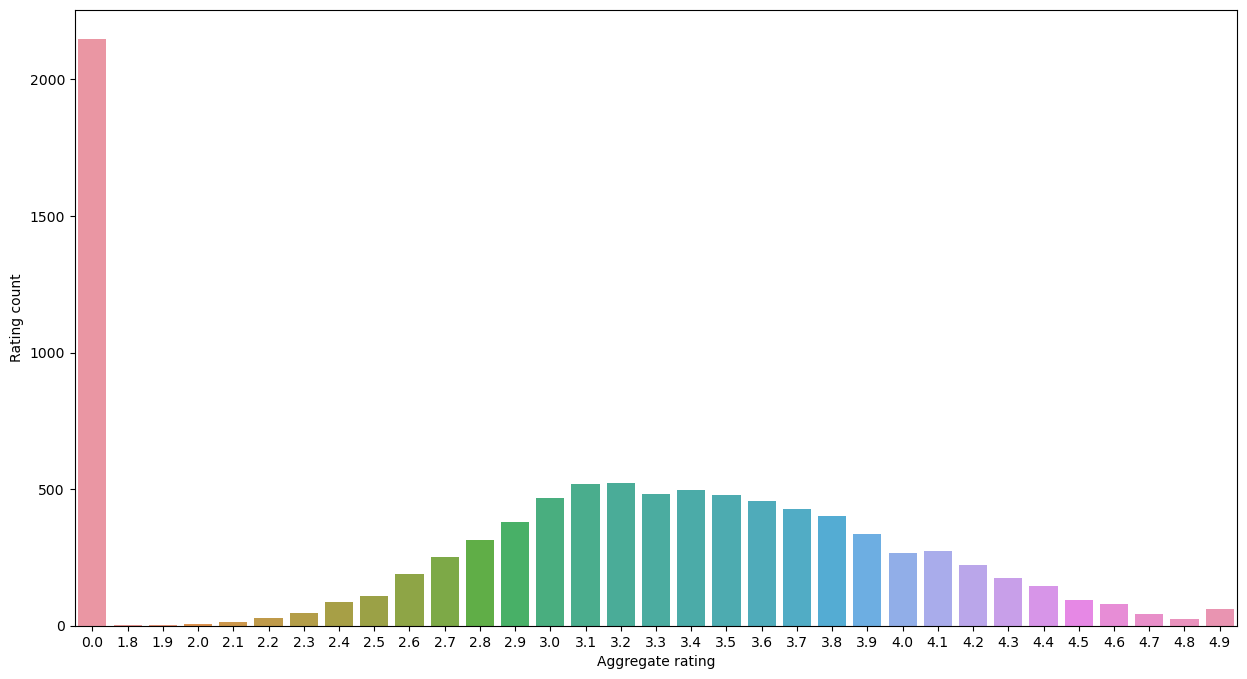

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(x='Aggregate rating',y='Rating count',data=rating)

In [52]:
c_rate=final_df.groupby(['Aggregate rating','Country']).size().reset_index()
 c_rate

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


In [54]:
labels=final_df.City.value_counts().index
labels

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

([<matplotlib.patches.Wedge at 0x22eb8835bd0>,
 [Text(-1.07479320772197, 0.23413577393196094, 'New Delhi'),
  Text(1.056503577535216, -0.3062681678779072, 'Gurgaon'),
  Text(1.093560093908513, -0.118854200644337, 'Noida'),
  Text(1.0979610170116392, -0.06694479160298568, 'Faridabad'),
  Text(1.0997733864424146, -0.022327079365287286, 'Ghaziabad')],
 [Text(-0.5862508405756199, 0.12771042214470596, '93.2%'),
  Text(0.5762746786555722, -0.1670553642970403, '4.7%'),
  Text(0.596487323950098, -0.06482956398782018, '0.9%'),
  Text(0.598887827460894, -0.03651534087435582, '0.6%'),
  Text(0.5998763926049533, -0.012178406926520337, '0.6%')])

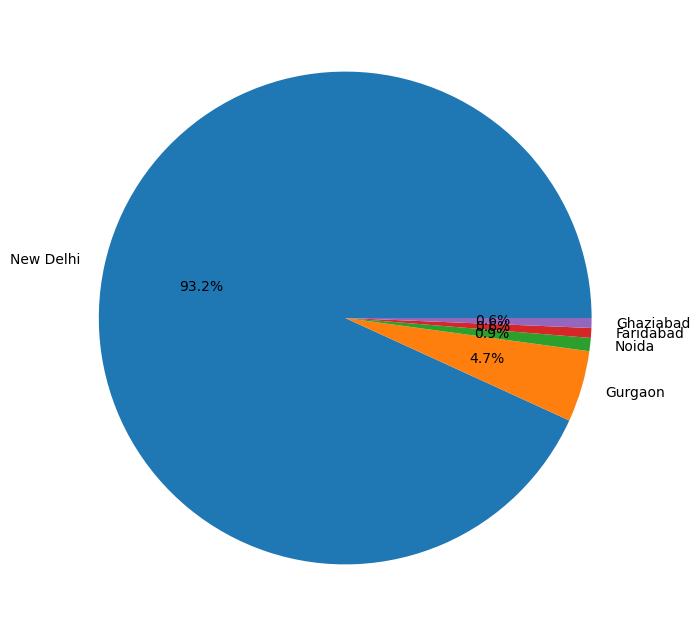

In [61]:
plt.figure(figsize=(25,8))
plt.pie(values[:5],labels=labels[:5],autopct='%1.1f%%')